In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [3]:
from utils.dataset_metadata import DatasetMetadata

In [5]:
path_to_dataset = 'C:/Users/tal22/Documents/repositories/generate_binary_and_instance_masks_for_cholecseg8k/datasets/instance_cholec_v3_during_quality_control'
dataset_name = 'instance_cholec_v1_before_quality_control'
dataset_style = "split_seq_img_dir-ann_dir"

In [6]:
dataset = DatasetMetadata(path_to_dataset=path_to_dataset,
                                          dataset_name=dataset_name,
                                          dataset_style=dataset_style)
                

In [7]:
dataset_metadata = dataset.get_dataset_metadata()

In [8]:
from dataset_analysis_scripts.count_files import count_sizes_in_my_dataset

In [10]:
total_count = count_sizes_in_my_dataset(dataset_metadata)
print(f"Total count images in the dataset: {total_count}")


Entering base data structure
   Entering sub-dictionary key 'test'
      size of seq 'VID09_seg8k': 240
      size of seq 'VID14_t50_full': 1709
      size of seq 'VID15_t50_full': 2059
      size of seq 'VID20_seg8k': 160
      size of seq 'VID22_t50_full': 1533
      size of seq 'VID24_seg8k': 960
      size of seq 'VID29_t50_full': 2351
      size of seq 'VID55_seg8k': 240
   Total count in sub-dictionary at key 'test': 9252
   Entering sub-dictionary key 'train'
      size of seq 'VID01_seg8k': 1280
      size of seq 'VID01_t50_full': 1734
      size of seq 'VID02_t50_sparse': 124
      size of seq 'VID04_t50_sparse': 70
      size of seq 'VID05_t50_sparse': 103
      size of seq 'VID06_t50_sparse': 93
      size of seq 'VID08_t50_sparse': 64
      size of seq 'VID103_t50_sparse': 74
      size of seq 'VID10_t50_sparse': 59
      size of seq 'VID110_t50_sparse': 73
      size of seq 'VID111_t50_sparse': 72
      size of seq 'VID12_seg8k': 640
      size of seq 'VID12_t50_full': 109

### Counting frequency in an image

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import sys
sys.path.append("..")

In [6]:
from utils.dataset_metadata import DatasetMetadata

In [7]:
# path_to_dataset = 'C:/Users/tal22/Documents/repositories/generate_binary_and_instance_masks_for_cholecseg8k/datasets/instance_cholec_v1_during_quality_control'
path_to_dataset = 'C:/Users/tal22/Documents/repositories/generate_binary_and_instance_masks_for_cholecseg8k/datasets/cholecseg8k_instance_redo'
dataset_name = 'cholecseg8k_instance_redo'
dataset_style = "split_seq_img_dir-ann_dir"

In [8]:
dataset = DatasetMetadata(path_to_dataset=path_to_dataset,
                                          dataset_name=dataset_name,
                                          dataset_style=dataset_style)
                

In [9]:
dataset_metadata = dataset.get_dataset_metadata()

In [10]:
from static_variables.dataset_variables import CholecInstanceSegVariables

instrument_id_to_instrument_class_dict = CholecInstanceSegVariables.instrument_id_to_instrument_class_dict

class_names = list(instrument_id_to_instrument_class_dict.values())

## Testing scripts

In [11]:
# def get_class_frequency_dict_image(ann_path):
        
#     class_frequency_dict_image = {class_name: 0   for class_name in class_names}
    
#     ann = read_from_json(ann_path)
#     for shape in ann['shapes']:
#         class_frequency_dict_image[shape['label']] += 1 
    
#     return class_frequency_dict_image

# get_class_frequency_dict_image('../t50_VID02_000828.json')

In [12]:

# class_frequency_dict_dataset = {}
# for split, seq_data in dataset_metadata.items():
#     class_frequency_dict_split = {}
#     for seq, annotations in seq_data.items():
#         class_frequency_dict_seq = {}
#         for annotation in annotations:
#             ann_path = annotation['ann_path']
#             ann_name = ann_path.split('/')[-1]
#             class_frequency_dict_image = get_class_frequency_dict_image(ann_path)
#             class_frequency_dict_seq[ann_name] = class_frequency_dict_image
#         class_frequency_dict_split[seq] = class_frequency_dict_seq
#     class_frequency_dict_dataset[split] = class_frequency_dict_split


In [13]:
# def get_class_frequency(class_frequency_dict, aggregation_level='dataset'):
#     target_dict = {}
#     for split, split_data in class_frequency_dict.items():
#         # if aggregation_level == 'dataset':
#         #     target_dict = class_frequency
#         # elif aggregation_level == 'split':
#         #     target_dict = class_frequency.setdefault(split, {})
#         # elif aggregation_level == 'sequence':
#         #     target_dict = class_frequency   
            
#         for seq_name, seq_data in split_data.items():
#             # print('seq_data', seq_data)
#             for ann_name, annotation in seq_data.items():
#                 # print('annotation', annotation)                    
#                 for instrument, frequency in annotation.items():
#                     if aggregation_level == 'dataset':
#                         target_dict.setdefault(instrument, 0)
#                         target_dict[instrument] += frequency
#                     elif aggregation_level == 'split':
#                         target_dict.setdefault(split, {}).setdefault(instrument, 0)
#                         target_dict[split][instrument] += frequency
#                     elif aggregation_level == 'sequence':
#                         target_dict.setdefault(seq_name, {}).setdefault(instrument, 0)
#                         target_dict[seq_name][instrument] += frequency
                        
#     return target_dict

# # Example usage:
# class_frequency_dict = {
#     'test': {
#         'VID09_seg8k': {
#             'seg8k_video09_000832.json': {'grasper': 0, 'hook': 0, 'irrigator': 1, 'clipper': 0, 'bipolar': 0, 'scissors': 3, 'snare': 0},
#             'seg8k_video09_000833.json': {'grasper': 1, 'hook': 0, 'irrigator': 0, 'clipper': 0, 'bipolar': 0, 'scissors': 0, 'snare': 0}
#         },   
#     },
#     'val': {
#         'VID11_seg8k': {
#             'seg8k_video01_000132.json': {'grasper': 0, 'hook': 4, 'irrigator': 1, 'clipper': 2, 'bipolar': 0, 'scissors': 3, 'snare': 0},
#             'seg8k_video01_000133.json': {'grasper': 0, 'hook': 0, 'irrigator': 1, 'clipper': 0, 'bipolar': 1, 'scissors': 0, 'snare': 0}
#         },   
#     }
# }


# class_frequency_dataset = get_class_frequency(class_frequency_dict_dataset, 'dataset')
# # print('dataset')
# # print(class_frequency_dataset)

# class_frequency_split = get_class_frequency(class_frequency_dict_dataset, 'split')
# # print('split')
# # print(class_frequency_dataset)



# class_frequency_sequence = get_class_frequency(class_frequency_dict_dataset, 'sequence')
# # print('seq')
# # print(class_frequency_dataset)

# print("Class Frequency Dictionary for Whole Dataset:")
# print(class_frequency_dataset)
# print("\nClass Frequency Per Split:")
# print(class_frequency_split)

# print("\nClass Frequency Per Sequence:")
# print(class_frequency_sequence)


In [14]:
# def count_instance_frequency(class_frequency_dict, aggregation_level='dataset'):
#     target_dict = {}
#     for split, split_data in class_frequency_dict.items():            
#         for seq_name, seq_data in split_data.items():
#             # print('seq_data', seq_data)
#             for ann_name, annotation in seq_data.items():
#                 # print('annotation', annotation)                    
#                 for instrument, frequency in annotation.items():
#                     if aggregation_level == 'dataset':
#                         target_dict.setdefault('total_instances', 0)
#                         target_dict['total_instances'] += frequency
#                     elif aggregation_level == 'split':
#                         target_dict.setdefault(split, 0)
#                         target_dict[split] += frequency
#                     elif aggregation_level == 'sequence':
#                         target_dict.setdefault(seq_name, 0)
#                         target_dict[seq_name] += frequency
#                     elif aggregation_level == 'image':
#                         target_dict.setdefault(ann_name, 0)
#                         target_dict[ann_name] += frequency    
                        
#     return target_dict

# # # Example usage:
# class_frequency_dict = {
#     'test': {
#         'VID09_seg8k': {
#             'seg8k_video09_000832.json': {'grasper': 0, 'hook': 0, 'irrigator': 1, 'clipper': 0, 'bipolar': 0, 'scissors': 3, 'snare': 0},
#             'seg8k_video09_000833.json': {'grasper': 1, 'hook': 0, 'irrigator': 0, 'clipper': 0, 'bipolar': 0, 'scissors': 0, 'snare': 0}
#         },   
#     },
#     'val': {
#         'VID11_seg8k': {
#             'seg8k_video01_000132.json': {'grasper': 0, 'hook': 4, 'irrigator': 1, 'clipper': 2, 'bipolar': 0, 'scissors': 3, 'snare': 0},
#             'seg8k_video01_000133.json': {'grasper': 0, 'hook': 0, 'irrigator': 1, 'clipper': 0, 'bipolar': 1, 'scissors': 0, 'snare': 0}
#         },   
#     }
# }


# instance_frequency_dataset = count_instance_frequency(class_frequency_dict, 'dataset')
# # print('dataset')
# # print(class_frequency_dataset)

# instance_frequency_split = count_instance_frequency(class_frequency_dict, 'split')
# # print('split')
# # print(class_frequency_dataset)

# instance_frequency_sequence = count_instance_frequency(class_frequency_dict, 'sequence')
# # print('seq')
# # print(class_frequency_dataset)

# instance_frequency_image = count_instance_frequency(class_frequency_dict, 'image')

# print("\ninstances in the Whole Dataset:")
# print(instance_frequency_dataset)

# print("\ninstances in splits:")
# print(instance_frequency_split)

# print("\ninstances in the Whole Dataset:")
# print(instance_frequency_sequence)

# print("\ninstances in all images:")
# print(instance_frequency_image)

In [15]:
from dataset_analysis_scripts.dataset_counter import DatasetCounter

In [19]:
from static_variables.dataset_variables import CholecInstanceSegVariables
instrument_id_to_instrument_class_dict = CholecInstanceSegVariables.instrument_id_to_instrument_class_dict
class_names = list(instrument_id_to_instrument_class_dict.values())

# path_to_dataset = 'C:/Users/tal22/Documents/repositories/generate_binary_and_instance_masks_for_cholecseg8k/datasets/instance_cholec_v1_during_quality_control'
path_to_dataset = 'C:/Users/tal22/Documents/repositories/generate_binary_and_instance_masks_for_cholecseg8k/datasets/cholecseg8k_instance_redo'
dataset_name = 'cholec_instance_seg'
dataset_style = "split_seq_img_dir-ann_dir"


In [20]:
counter_for_cholec_instance_seg =  DatasetCounter(
    path_to_dataset=path_to_dataset,
    dataset_name = dataset_name,
    dataset_style=dataset_style,    
    class_names = class_names,
    )

In [21]:
dataset_class_frequency = counter_for_cholec_instance_seg.count_class_frequency(aggregation_level='dataset')

## plotting class frequency in dataset plot

In [22]:
dataset_class_frequency

{'grasper': 8390,
 'hook': 2148,
 'irrigator': 0,
 'clipper': 0,
 'bipolar': 0,
 'scissors': 0,
 'snare': 0}

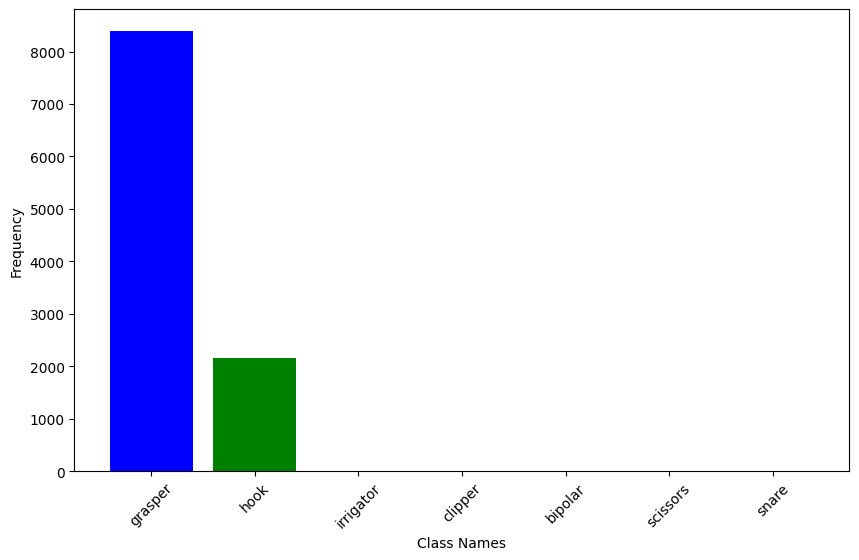

In [23]:
import matplotlib.pyplot as plt

# Sample dictionary containing class names and their frequencies

# Extracting class names and frequencies
class_names = list(dataset_class_frequency.keys())
frequencies = list(dataset_class_frequency.values())

# Define colors for each class
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_names, frequencies, color=colors)

# Adding labels and title
plt.xlabel('Class Names')
plt.ylabel('Frequency')
# plt.title('Class Frequency')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


## Plot instance frequency

In [24]:
dataset_sequence_instance_frequency = counter_for_cholec_instance_seg.count_instance_frequency(aggregation_level='image')

In [25]:
# dataset_sequence_instance_frequency

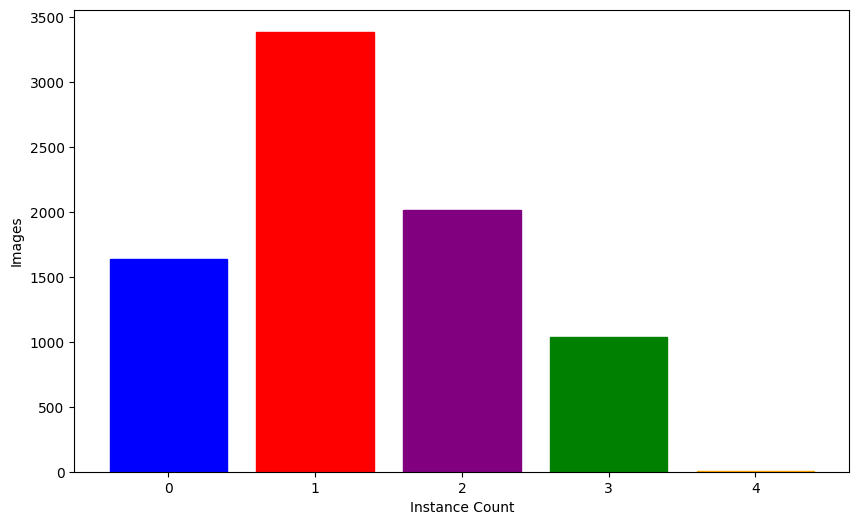

In [26]:
import matplotlib.pyplot as plt
import numpy as np


# Calculate frequency of each instance count
frequency = {}
for count in dataset_sequence_instance_frequency.values():
    frequency[count] = frequency.get(count, 0) + 1

# Create lists of instance counts and their frequencies
instance_count_values = list(frequency.keys())
instance_frequency_values = list(frequency.values())

# Define colors for each instance count
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'pink']

# Plotting the instance frequency chart with different colors for each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(instance_count_values, instance_frequency_values)

# Assigning colors to bars
for i, bar in enumerate(bars):
    bar.set_color(colors[i % len(colors)])

# Adding labels and title
plt.xlabel('Instance Count')
plt.ylabel('Images')

# Displaying the plot
plt.show()


## Sanity Checks

In [27]:
from quality_control_scripts.quality_control_utils import get_seq_folder_from_ann_name, transfer_files_for_repair_to_repair_folder
import os

In [28]:
instances_with_4_or_more_instruments_dict = {k: v for k, v in dataset_sequence_instance_frequency.items() if v >= 4}

In [29]:
instances_with_4_or_more_instruments_names = list(instances_with_4_or_more_instruments_dict.keys())

In [30]:
instances_with_4_or_more_instruments_names

['video12_frame_15837.json',
 'video52_frame_2769.json',
 'video55_frame_576.json']

In [48]:
# ann_path  = f'C:/Users/tal22/Documents/repositories/generate_binary_and_instance_masks_for_cholecseg8k/datasets/instance_cholec_v1_during_quality_control/test/VID15_t50_full/ann_dir/t50_VID15_001569.json' 

In [31]:
# instances_with_4_or_more_instruments_path = []
# for ann_name in instances_with_4_or_more_instruments_names:     
#         dataset_seq_dir = get_seq_folder_from_ann_name(path_to_dataset,
#                                 ann_name)
#         # print(dataset_seq_dir)
#         dataset_seq_ann_dir = os.path.join(dataset_seq_dir, 'ann_dir')
#         ann_path = os.path.join(dataset_seq_ann_dir, ann_name)
        
#         instances_with_4_or_more_instruments_path.append(ann_path)

TypeError: expected str, bytes or os.PathLike object, not NoneType

In [26]:
#  instances_with_4_or_more_instruments_path

In [27]:
transfer_files_for_repair_to_repair_folder(instances_with_4_or_more_instruments_path)

Moved t50_VID15_001302.json and corresponding image to repair directory.
Moved t50_VID22_001296.json and corresponding image to repair directory.
Moved t50_VID22_001298.json and corresponding image to repair directory.
Moved seg8k_video01_014940.json and corresponding image to repair directory.
Moved seg8k_video01_015036.json and corresponding image to repair directory.
Moved seg8k_video01_016645.json and corresponding image to repair directory.
Moved t50_VID12_000702.json and corresponding image to repair directory.
Moved t50_VID12_000703.json and corresponding image to repair directory.
Moved t50_VID12_000912.json and corresponding image to repair directory.
Moved t50_VID18_001284.json and corresponding image to repair directory.
Moved t50_VID18_001578.json and corresponding image to repair directory.
Moved t50_VID18_001591.json and corresponding image to repair directory.
Moved t50_VID27_000871.json and corresponding image to repair directory.
Moved t50_VID27_000898.json and corresp

### Return files back

In [28]:
# from quality_control_scripts.quality_control_utils import get_back_files_from_the_repair_folder_to_the_original_folders

In [29]:
# get_back_files_from_the_repair_folder_to_the_original_folders(path_to_dataset)

Moved seg8k_video01_014940.json and corresponding image seg8k_video01_014940.png to repair directory.
Moved seg8k_video01_015036.json and corresponding image seg8k_video01_015036.png to repair directory.
Moved seg8k_video01_016645.json and corresponding image seg8k_video01_016645.png to repair directory.
Moved t50_VID12_000702.json and corresponding image t50_VID12_000702.png to repair directory.
Moved t50_VID12_000703.json and corresponding image t50_VID12_000703.png to repair directory.
Moved t50_VID12_000912.json and corresponding image t50_VID12_000912.png to repair directory.
Moved t50_VID15_001302.json and corresponding image t50_VID15_001302.png to repair directory.
Moved t50_VID18_001284.json and corresponding image t50_VID18_001284.png to repair directory.
Moved t50_VID18_001578.json and corresponding image t50_VID18_001578.png to repair directory.
Moved t50_VID18_001591.json and corresponding image t50_VID18_001591.png to repair directory.
Moved t50_VID22_001296.json and corr

## Plot instances per sequence per partition 

I want to plot the spread of instances in each sequence. 

So we need the amount of instance of instruments per image per sequence, 

then we need a function that moves a list of sequences to partitions.     

In [54]:
dataset_sequence_instance_frequency = counter_for_cholec_instance_seg.count_instance_frequency(aggregation_level='sequence_and_image')

In [55]:
dataset_sequence_instance_frequency

{'VID09_seg8k': {'seg8k_video09_000832.json': 0,
  'seg8k_video09_000833.json': 0,
  'seg8k_video09_000834.json': 0,
  'seg8k_video09_000835.json': 0,
  'seg8k_video09_000836.json': 0,
  'seg8k_video09_000837.json': 0,
  'seg8k_video09_000838.json': 0,
  'seg8k_video09_000839.json': 0,
  'seg8k_video09_000840.json': 0,
  'seg8k_video09_000841.json': 0,
  'seg8k_video09_000842.json': 0,
  'seg8k_video09_000843.json': 0,
  'seg8k_video09_000844.json': 0,
  'seg8k_video09_000845.json': 0,
  'seg8k_video09_000846.json': 0,
  'seg8k_video09_000847.json': 0,
  'seg8k_video09_000848.json': 0,
  'seg8k_video09_000849.json': 0,
  'seg8k_video09_000850.json': 0,
  'seg8k_video09_000851.json': 0,
  'seg8k_video09_000852.json': 0,
  'seg8k_video09_000853.json': 0,
  'seg8k_video09_000854.json': 0,
  'seg8k_video09_000855.json': 0,
  'seg8k_video09_000856.json': 0,
  'seg8k_video09_000857.json': 0,
  'seg8k_video09_000858.json': 0,
  'seg8k_video09_000859.json': 0,
  'seg8k_video09_000860.json': 0,

In [58]:
dataset_partition_sequence_instance_frequency =  {
    'seg8k' : {},
    'full': {},
    'sparse': {}
}

for seq in dataset_sequence_instance_frequency.keys():
    if seq[-5:] == 'seg8k':
        dataset_partition_sequence_instance_frequency['seg8k'][seq] = dataset_sequence_instance_frequency[seq]
        
    elif seq[-4:] == 'full': 
        dataset_partition_sequence_instance_frequency['full'][seq] = dataset_sequence_instance_frequency[seq]
        
    elif seq[-6:] == 'sparse':
        dataset_partition_sequence_instance_frequency['sparse'][seq] = dataset_sequence_instance_frequency[seq]  
           
    

In [60]:
dataset_partition_sequence_instance_frequency

{'seg8k': {'VID09_seg8k': {'seg8k_video09_000832.json': 0,
   'seg8k_video09_000833.json': 0,
   'seg8k_video09_000834.json': 0,
   'seg8k_video09_000835.json': 0,
   'seg8k_video09_000836.json': 0,
   'seg8k_video09_000837.json': 0,
   'seg8k_video09_000838.json': 0,
   'seg8k_video09_000839.json': 0,
   'seg8k_video09_000840.json': 0,
   'seg8k_video09_000841.json': 0,
   'seg8k_video09_000842.json': 0,
   'seg8k_video09_000843.json': 0,
   'seg8k_video09_000844.json': 0,
   'seg8k_video09_000845.json': 0,
   'seg8k_video09_000846.json': 0,
   'seg8k_video09_000847.json': 0,
   'seg8k_video09_000848.json': 0,
   'seg8k_video09_000849.json': 0,
   'seg8k_video09_000850.json': 0,
   'seg8k_video09_000851.json': 0,
   'seg8k_video09_000852.json': 0,
   'seg8k_video09_000853.json': 0,
   'seg8k_video09_000854.json': 0,
   'seg8k_video09_000855.json': 0,
   'seg8k_video09_000856.json': 0,
   'seg8k_video09_000857.json': 0,
   'seg8k_video09_000858.json': 0,
   'seg8k_video09_000859.json':

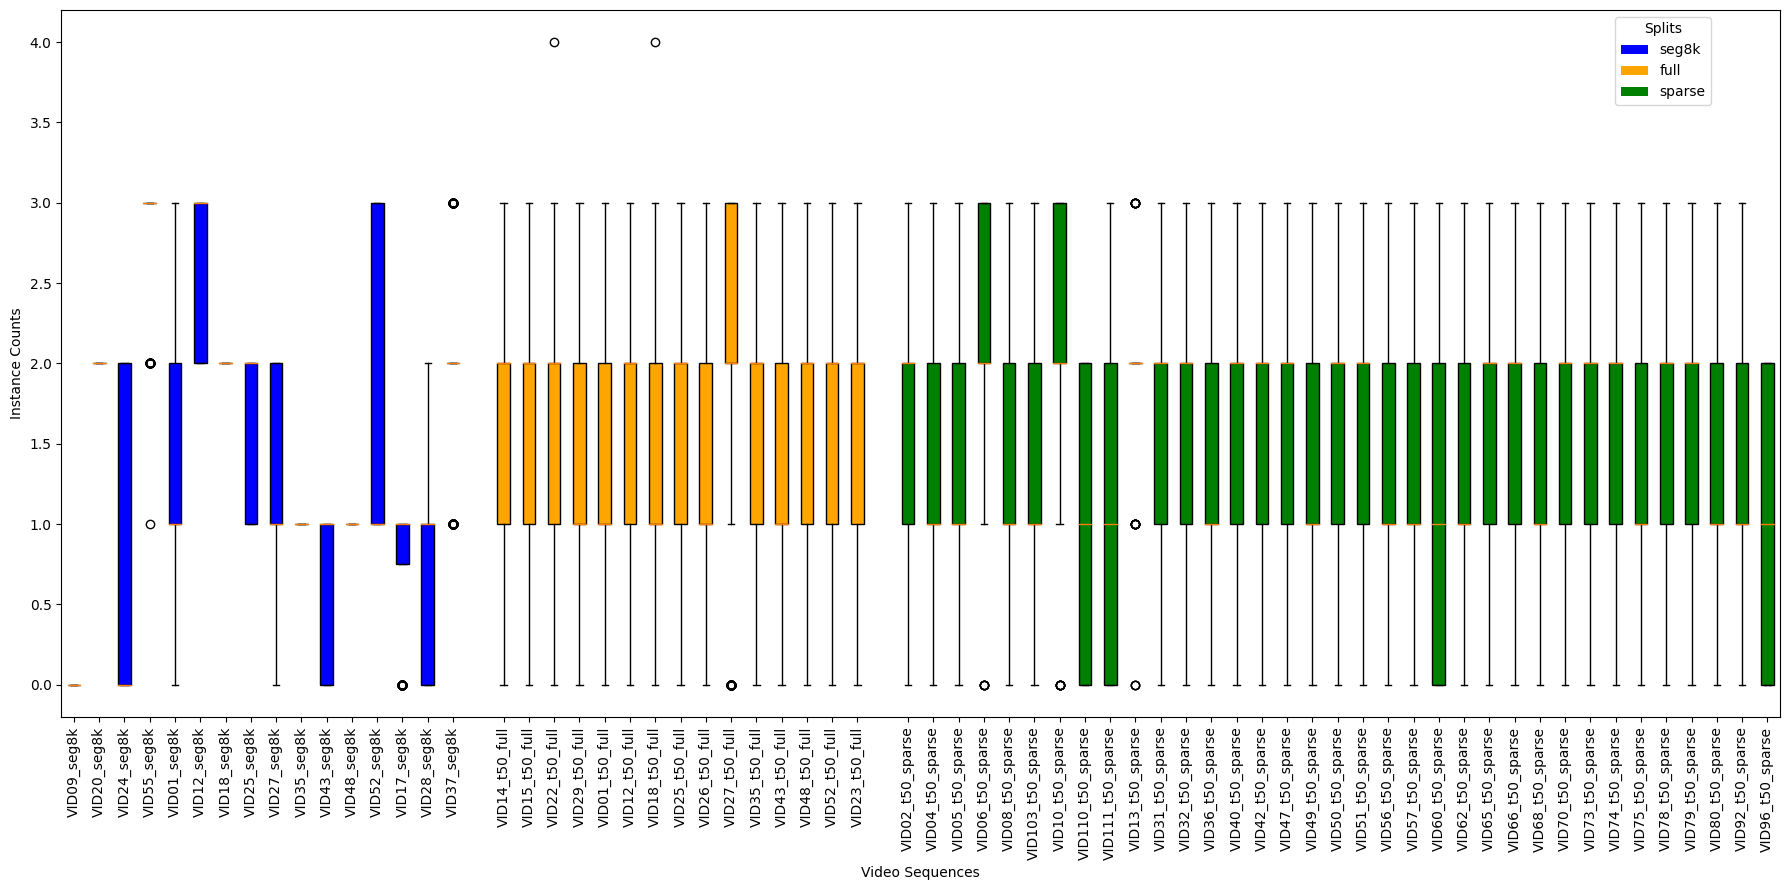

: 

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Given dataset
# instance_counts = {
#     'train': {
#         'VID09_seg8k': {
#             'seg8k_video09_000832.json': 0,
#             'seg8k_video09_000833.json': 1,
#             'seg8k_video09_000834.json': 2,
#         },
#         'VID10_seg8k': {
#             'seg8k_video10_000001.json': 1,
#             'seg8k_video10_000002.json': 3,
#             'seg8k_video10_000003.json': 2,
#         },
#     },
#     'val': {
#         'VID01_full': {
#             'full_video01_000832.json': 0,
#             'full_video01_000833.json': 1,
#             'full_video01_000834.json': 2,
#         },
#         'VID03_full': {
#             'full_video03_000832.json': 0,
#             'full_video03_000833.json': 1,
#             'full_video03_000834.json': 2,
#         },
#     },
#     'test': {
#         'VID02_sparse': {
#             'sparse_video02_000832.json': 0,
#             'sparse_video02_000833.json': 1,
#             'sparse_video02_000834.json': 2,
#         }
#     }
# }

# Prepare data for plotting with spacing
data = []
labels = []
xticks = []
xticklabels = []
colors = []
color_map = {'seg8k': 'blue', 'full': 'orange', 'sparse': 'green'}

# Starting position for the first group on x-axis
current_position = 1

# Loop through each split and sequence to gather data
for split, sequences in dataset_partition_sequence_instance_frequency.items():
    for sequence_name, annotations in sequences.items():
        annotation_values = list(annotations.values())
        data.append(annotation_values)
        labels.append(sequence_name)
        colors.append(color_map[split])
        xticks.append(current_position)
        current_position += 1  # Move to the next position for the next sequence
    current_position += 1  # Additional space between splits

# Actual plotting
plt.figure(figsize=(18, 9))

# Create subplots for each group
parts = plt.boxplot(data, patch_artist=True, positions=xticks)

# Coloring each box
for patch, color in zip(parts['boxes'], colors):
    patch.set_facecolor(color)

# Set xticks and labels
plt.xticks(ticks=xticks, labels=labels, rotation=90)

# Adding legend for splits
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color_map[split], label=split) for split in color_map]
plt.legend(handles=legend_elements, title="Splits", bbox_to_anchor=(0.9, 1), loc='upper left')

# Labeling
plt.xlabel('Video Sequences')
plt.ylabel('Instance Counts')
# plt.title('Instance Counts per Video Sequence by Split')
plt.tight_layout()  # Adjust layout to include the legend

# Show plot with adjusted xticks
plt.show()
